# Description

This code loads in raw Berkeley Earth Data, then evaluates and plots the first year of valid data at each grid location around the world. It creates and saves out Fig. S2.

**FIGURES PRODUCED IN THIS CODE**
* [Fig. S2](./paper_figures/si/figS2.pdf)

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import utilities as util

# ignore depreciation warnings in this code
import warnings
warnings.filterwarnings("ignore")

# define the locations to save the figures into
fig_main_savepath='./paper_figures/main/'
fig_si_savepath='./paper_figures/si/'

# Load Berkeley Earth Data

In [2]:
# define the locations of the raw Berkeley data
datpath='./data/berkeley/'
filename='Berkeley_TMAX_land_188001_201712_daily_N96_365days_degC.nc'

# load the data in with xarray
bmdat=xr.open_dataset(datpath+filename)

# organize the data by setting up the time grid and removing the south pole
bmdat['time']=util.get_dt64(bmdat)

# define the valid locations of data
valid=(bmdat.sel(time=slice(bmdat['time'][-2], bmdat['time'][-2])).TMAX.squeeze()>-200)

# Determine Missing Years

In [3]:
# find the first years in each location where there is valid data
missvals=~xr.ufuncs.isnan(bmdat).TMAX
timemissi=missvals.argmax('time')
firstyear=bmdat.time[timemissi].dt.year.where(valid>0)

In [4]:
# find the year (above 60 degrees S) that is the latest missing year
print('first year == '+str(int(firstyear.sel(lat=slice(-60,90)).max().values-1)))

first year == 1954


# Plot the Result (Fig. S2)

In [5]:
# define the contour levels by decade
levs=np.arange(1880,1980+1,10)

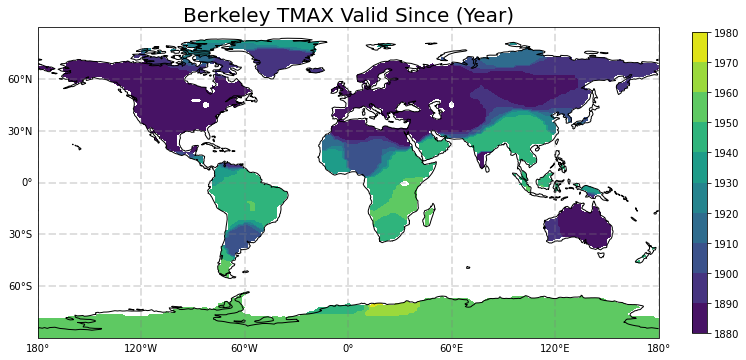

In [6]:
# set up the plot
fig=plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree())

# wrap around the prime meridian
firstyear_cyc = util.xr_add_cyclic_point(firstyear, 'lon')

# plot the first year
datp=plt.contourf(firstyear_cyc.lon,firstyear_cyc.lat,firstyear_cyc,levels=levs, transform=ccrs.PlateCarree())
plt.colorbar(datp,fraction=0.0225,ticks=levs)

# add plot details
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.25, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

plt.title('Berkeley TMAX Valid Since (Year)',fontsize=20)

plt.show()

# save the plot out
plot_save_name='figS2.pdf'
fig.savefig(fig_si_savepath+plot_save_name, dpi=300, bbox_inches='tight')